In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 17.0 MB/s eta 0:00:00


Developed a Custom Missile Object Detection for the Israeli Missiles. For more projects and collaborations check out my GitHub: https://github.com/YadidyaM


In [2]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow
!curl -L "https://public.roboflow.com/ds/K7mkRFE4EL?key=IYPDqY8bme" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   3024      0 --:--:-- --:--:-- --:--:--  3033
100 21.2M  100 21.2M    0     0  13.2M      0  0:00:01  0:00:01 --:--:-- 19.2M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg  
 extracting: test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg  
 extracting: test/images/DJI_0262_JPG.rf.560b

In [4]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/data.yaml epochs=80 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 112MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

# **View Training Results**

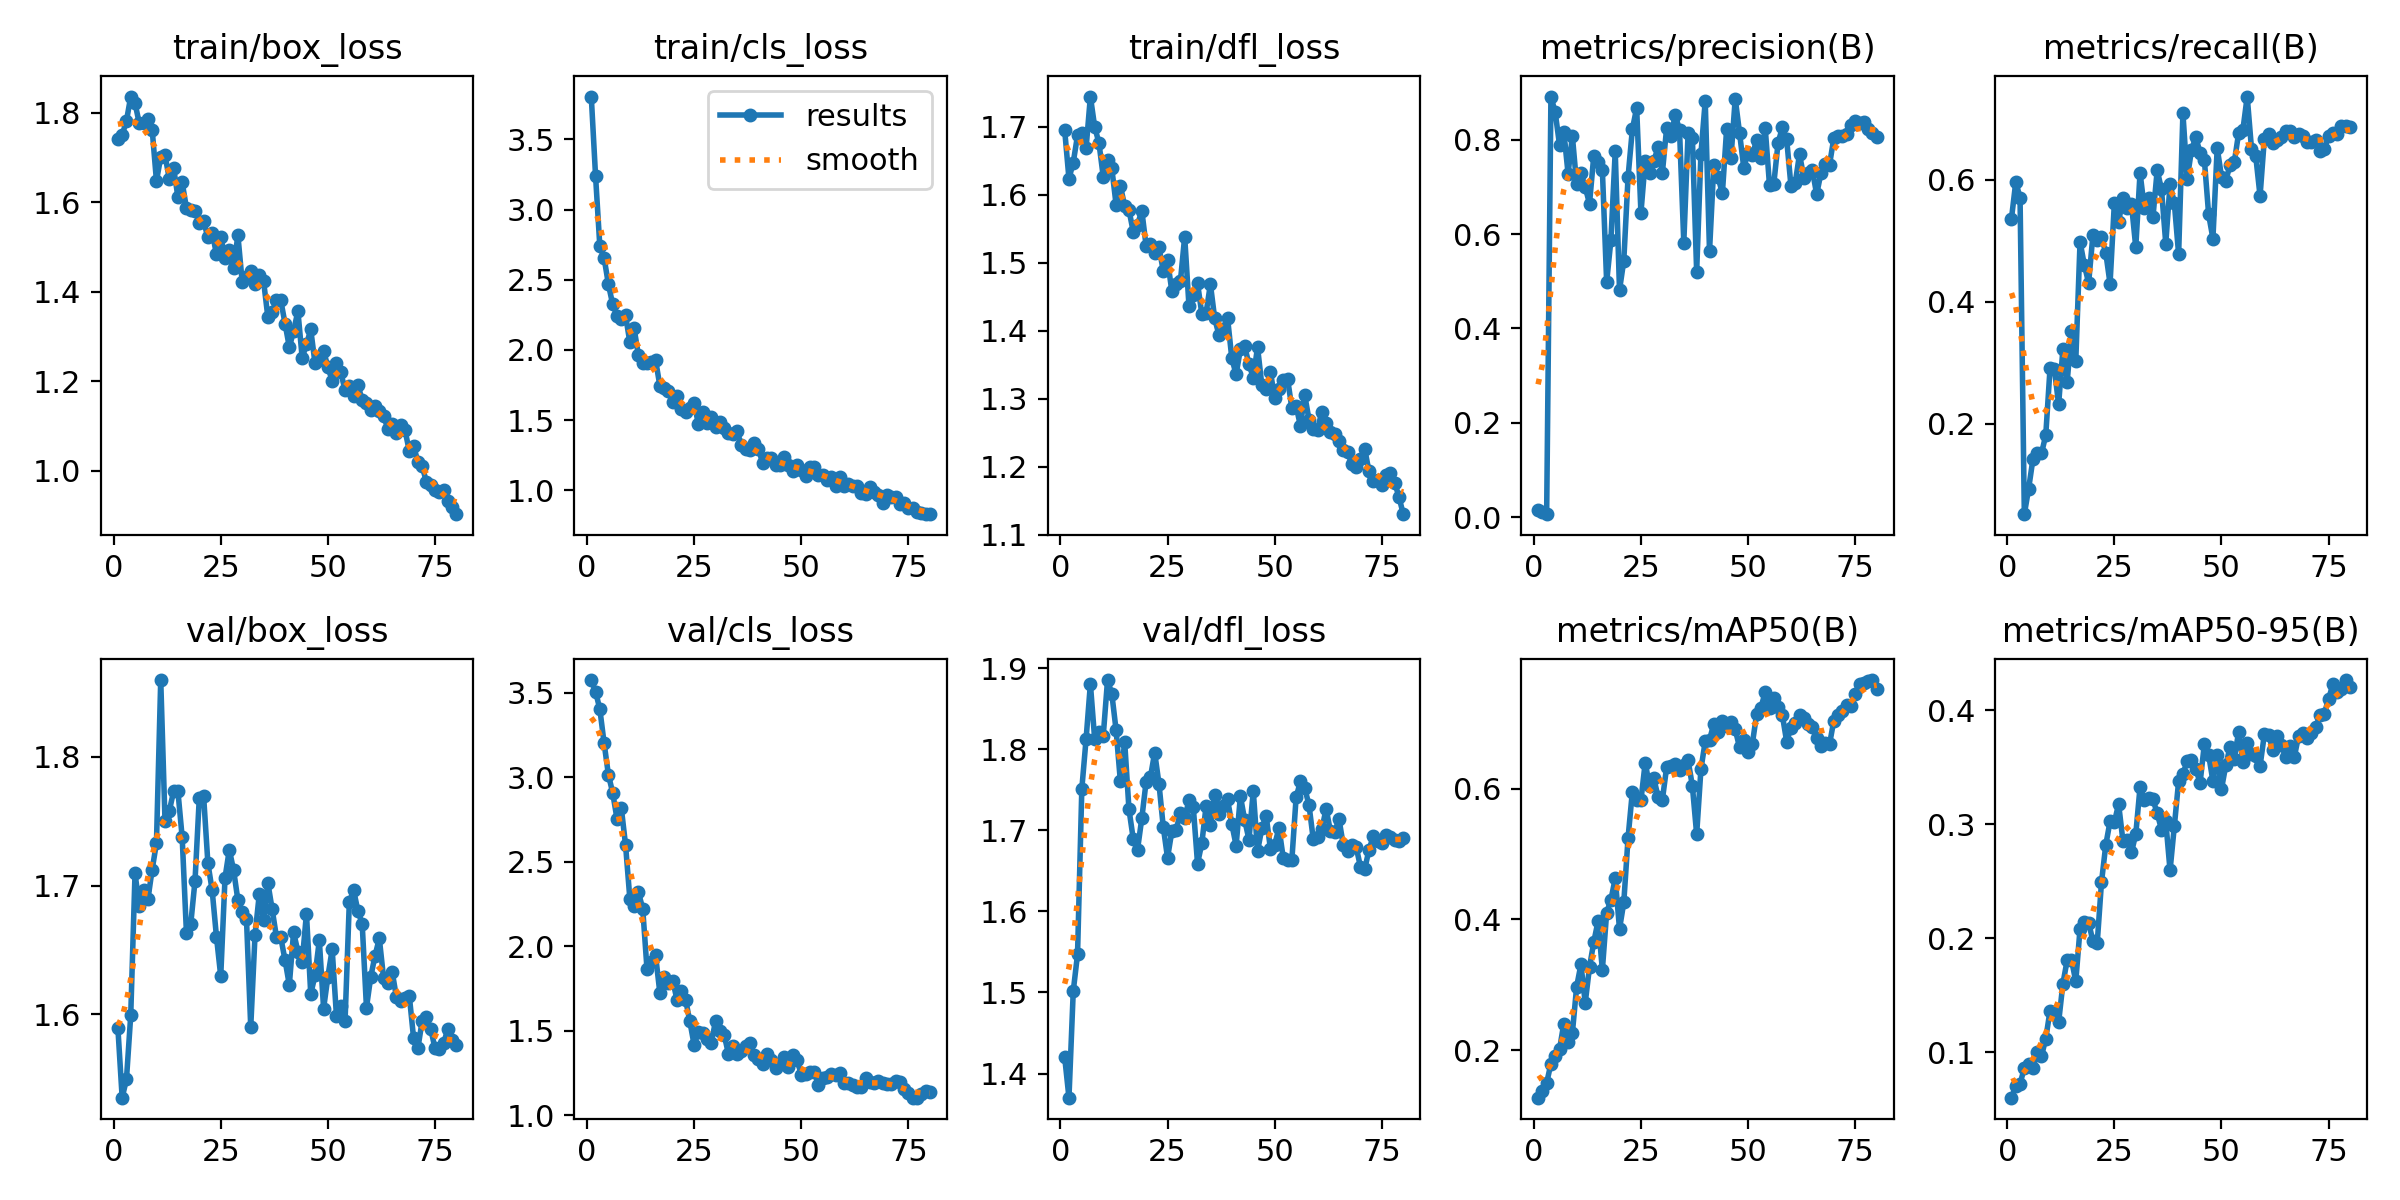

In [5]:
display(Image(filename='/content/runs/detect/train/results.png', width=600))

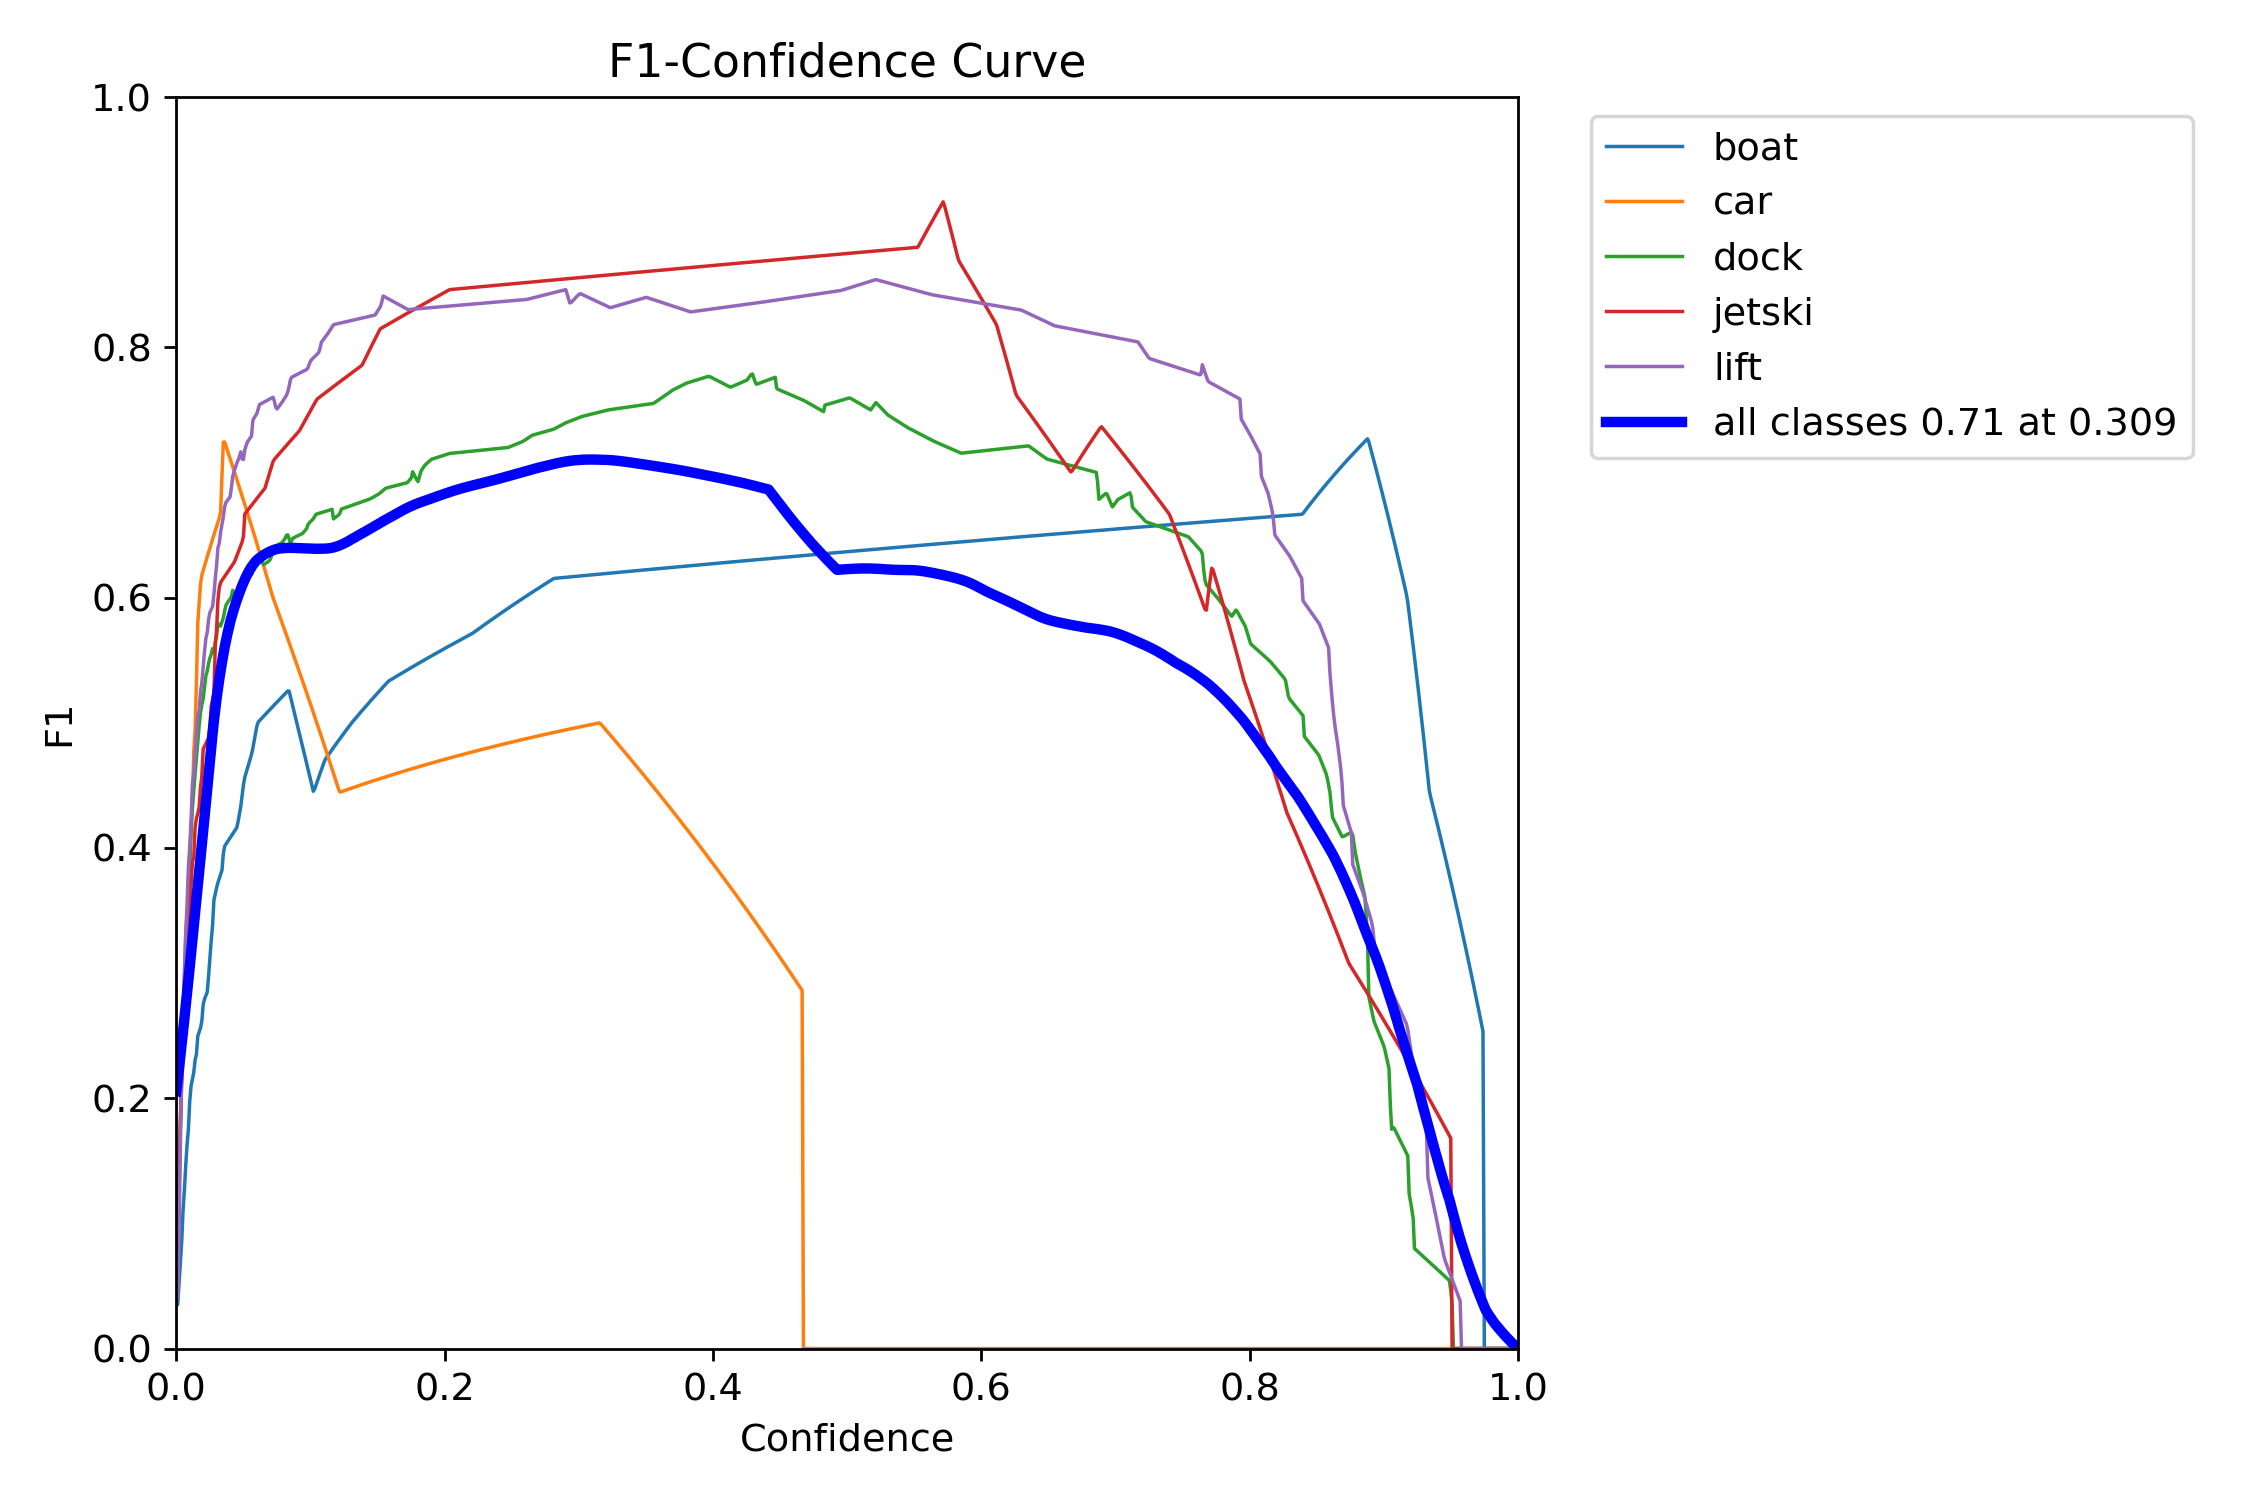

In [6]:
display(Image(filename='/content/runs/detect/train/F1_curve.png', width=600))

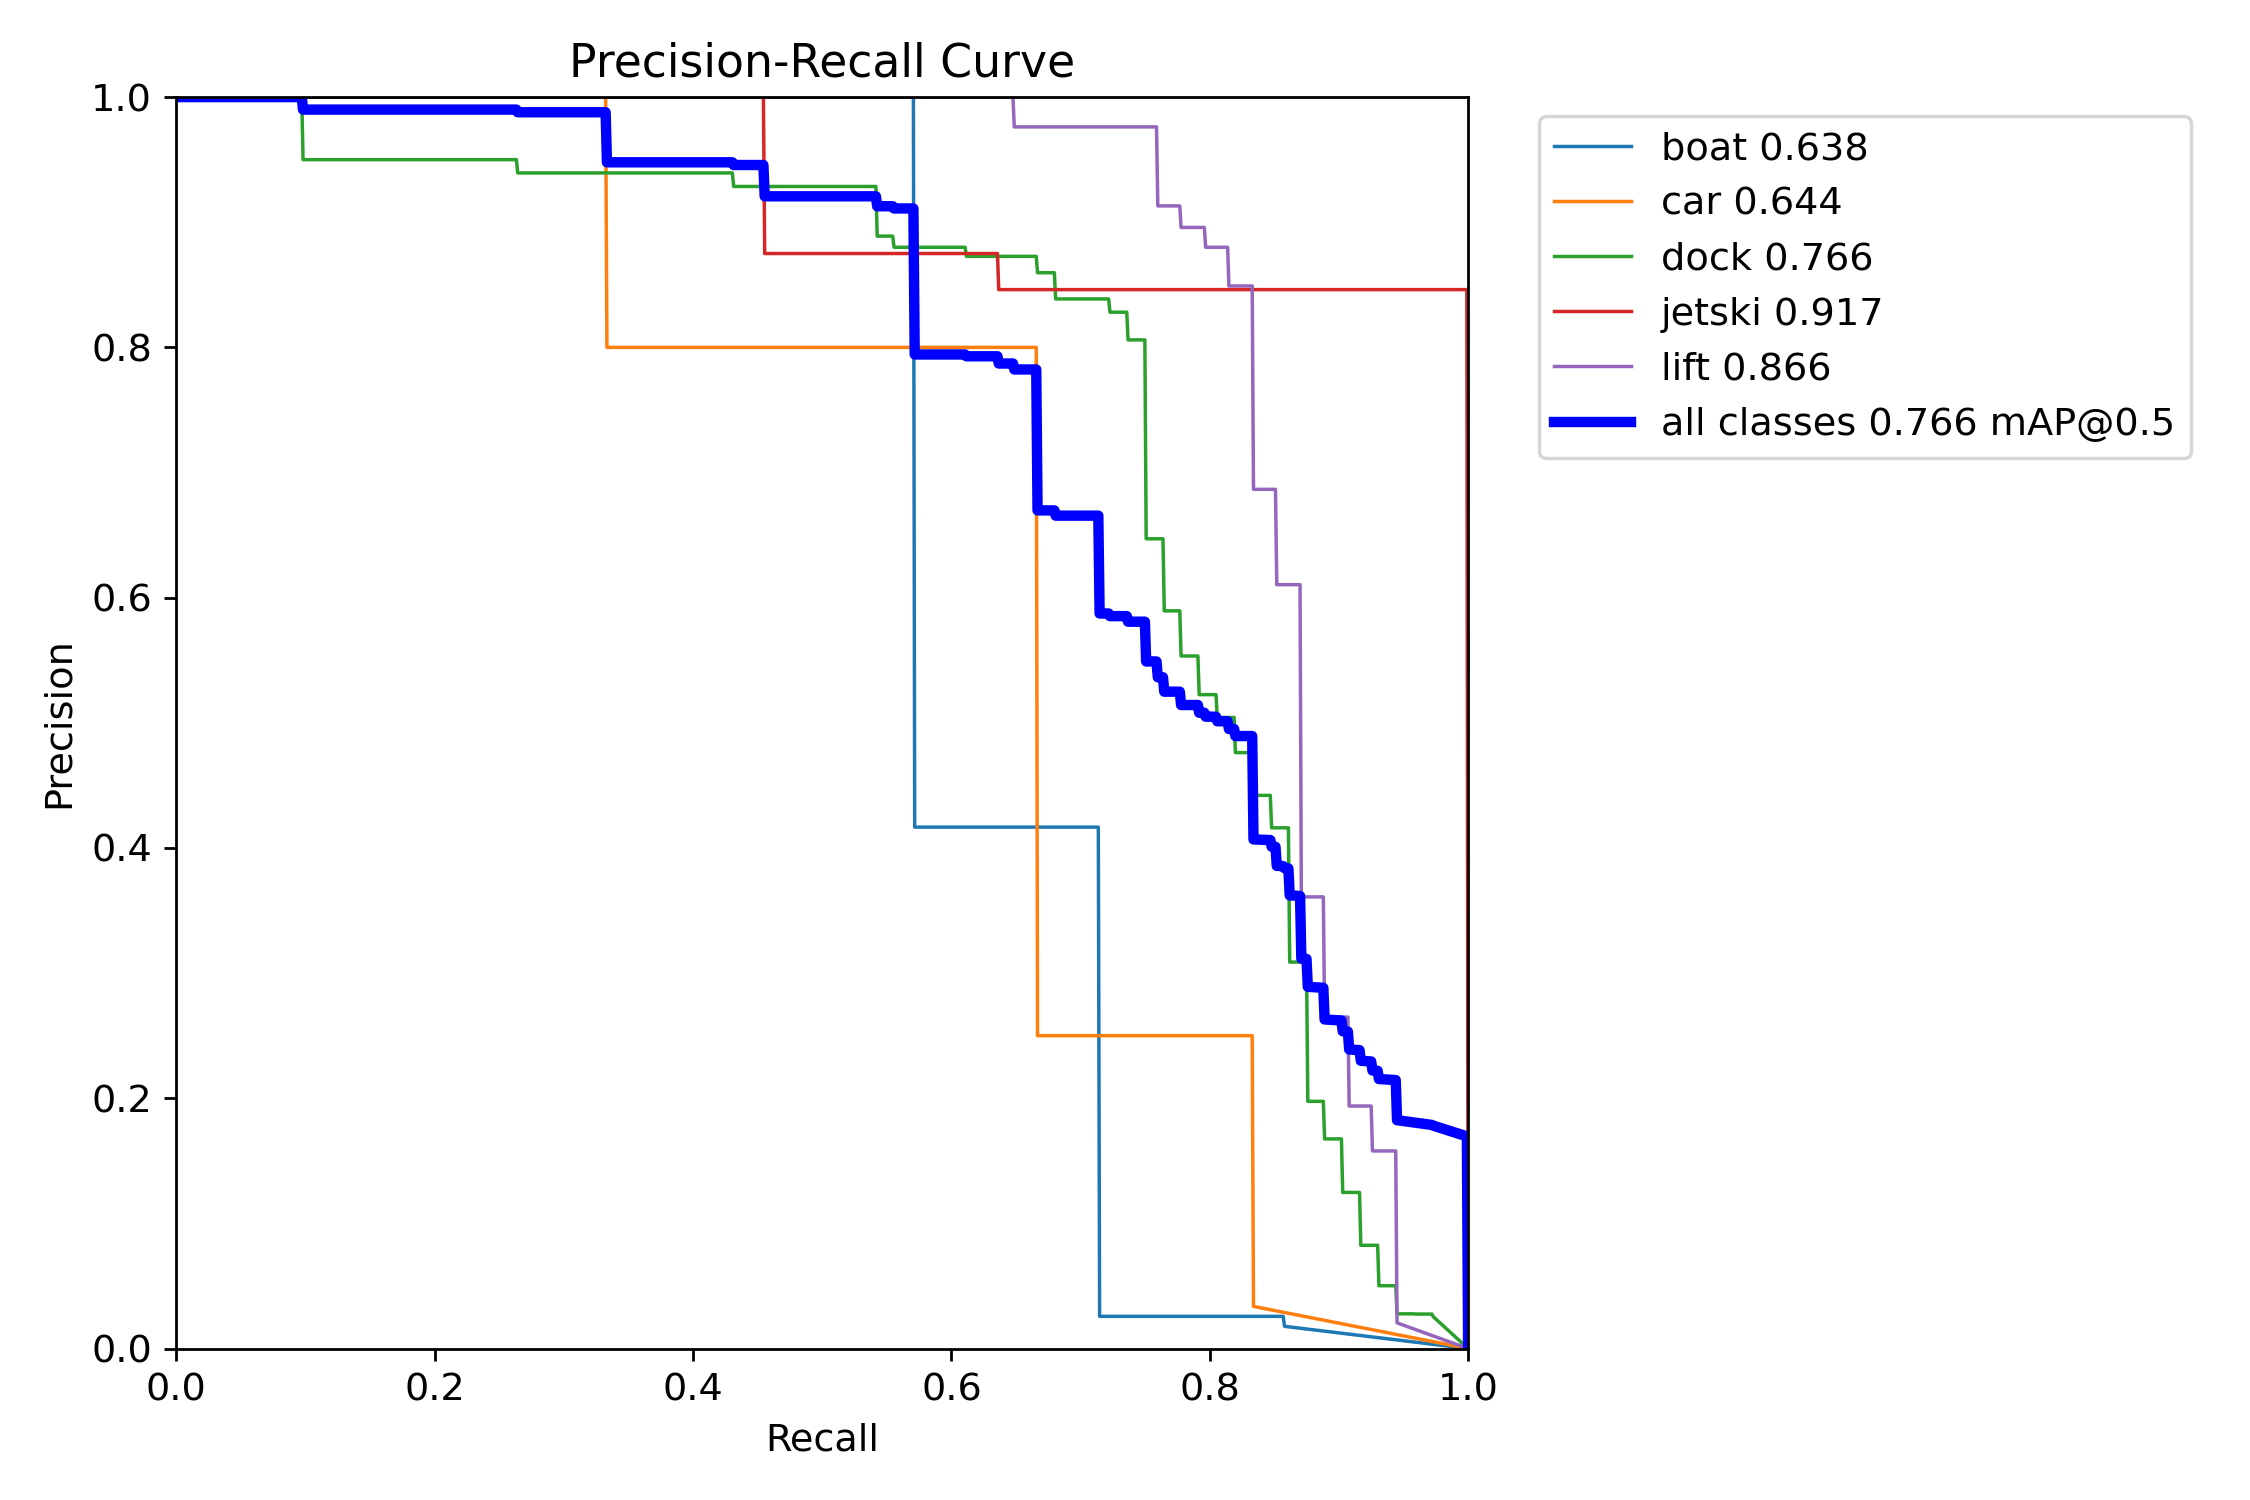

In [7]:
display(Image(filename='/content/runs/detect/train/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.30it/s]
                   all         61        150      0.814      0.686      0.766      0.424
                  boat          7          7      0.676      0.571      0.638      0.416
                   car          4          6          1      0.331      0.644      0.375
                  dock         50         72       0.75       0.75      0.766      0.403
                jetski         10         11      0.751          1      0.917      0.418
                  lift         38         54      0.894      0.778      0.866      0.509
Speed: 2.1ms preprocess, 10.3ms inference, 0.0ms loss, 17.2ms postp

# **Inference with custom model**

In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/28 /content/test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg: 480x640 (no detections), 43.1ms
image 2/28 /content/test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg: 480x640 (no detections), 8.5ms
image 3/28 /content/test/images/DJI_0262_JPG.rf.560b36a2e292c1b3dee7eae7e1f3fbf0.jpg: 480x640 1 dock, 1 jetski, 2 lifts, 7.8ms
image 4/28 /content/test/images/DJI_0262_JPG.rf.5f24b2ccccf544d3bb0c3cb740be0f4b.jpg: 480x640 1 boat, 1 dock, 1 lift, 9.3ms
image 5/28 /content/test/images/DJI_0262_JPG.rf.66b031d30a28587d2c06f38af05cb4ec.jpg: 480x640 2 docks, 1 lift, 7.9ms
image 6/28 /content/test/images/DJI_0262_JPG.rf.8c378a23b8822f63a44ad24c8787fab3.jpg: 480x640 1 dock, 1 lift, 8.9ms
image 7/28 /content/test/images/DJI_0262_JPG.rf.ace6b92f0a985e6e7b5ce8f800b2457d.jpg: 480x640 1 dock, 1 jetski, 1 l

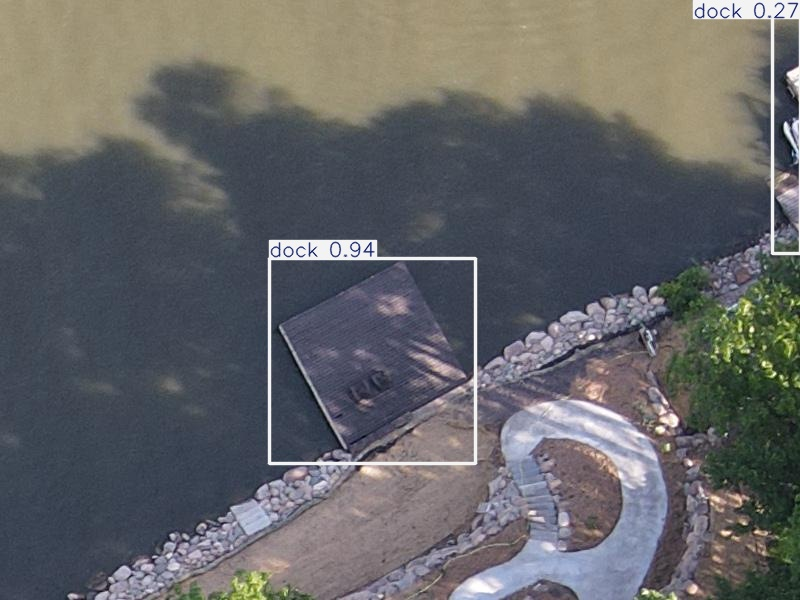

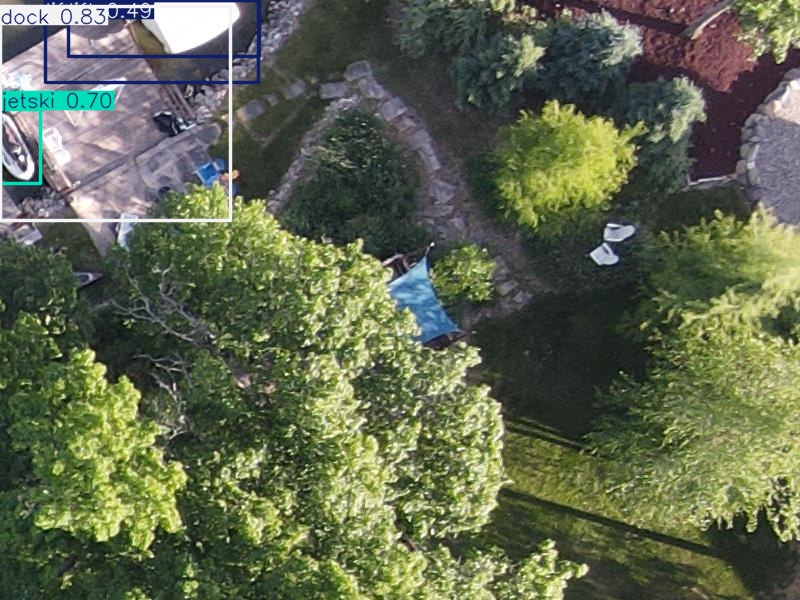

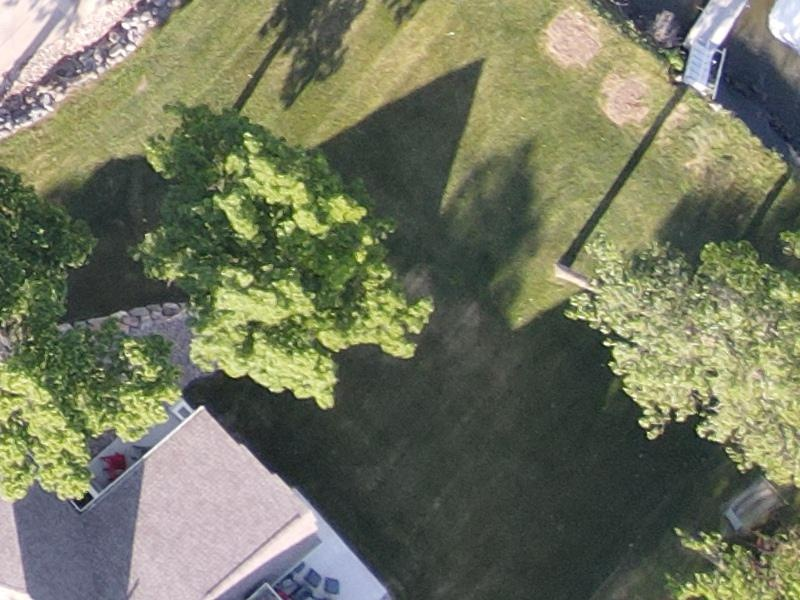

In [10]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [11]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [15]:
!pip install opencv-python
import cv2 # Importing the cv2 module
import glob
import os
from IPython.display import Image as IPyImage, display

video_path = '/content/DRONE ON A JET SKI ｜ DJI Mavic 2 Pro (online-video-cutter.com) (1).mp4'
output_path = '/content/Drone_video.mp4'

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [16]:
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

In [17]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()


0: 384x640 (no detections), 48.6ms
Speed: 2.5ms preprocess, 48.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 31.1ms
Speed: 2.1ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 54.8ms
Speed: 8.8ms preprocess, 54.8ms inference, 20.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 0.8ms postprocess per image at shape (1, 3,